In [217]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [218]:
dfx=pd.read_csv('./Datasets/Logistic_Data/logisticX.csv')
dfy=pd.read_csv('./Datasets/Logistic_Data/logisticY.csv')

In [219]:
X=dfx.values
Y=dfy.values
print(X.shape)
print(Y.shape)
theta=np.zeros((X.shape[1],))
print(theta.shape)
X=(X-X.mean()/X.std())

(99, 2)
(99, 1)
(2,)


In [220]:
split=int(0.8*(Y.shape[0]))
xt=X[:split,:]
xd=X[split:,:]
yt=Y[:split,:]
yd=Y[split:,:]
yt=yt.reshape(-1,)
yd=yd.reshape(-1,)
print(xt.shape)
print(yd.shape)

(79, 2)
(20,)


In [252]:
def hyp(X,theta,b):
    return sig(np.dot(X,theta) + b)
    

In [253]:
def sig(a):
    return (1.0/(1.0+(np.exp(-1*a))))

In [254]:
def error(X,theta,b,Y):
    i=0
    m=X.shape[0]
    er=0
    while(i<m):
        h=hyp(X[i],theta,b)
        er+=Y[i]*np.log2(1.0*h)+1.0*((1-Y[i])*np.log2(1.0-h))
        i+=1
    return (-er/m)

In [266]:
def acc(x_tst,w,b,y_tst):
    i=0
    m=x_tst.shape[0]
    y_pred = []
    
    while(i<m):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        i+=1
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]
        
def predict(x,w,b):
    
    confidence = hyp(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

    

In [267]:
def grad(X,Y,theta,b):
    gr=np.zeros(theta.shape)
    i=0
    f=0.0
    m=X.shape[0]
    while(i<m):
        h=hyp(X[i],theta,b)
        gr+=(Y[i]-h)*X[i]
        f+= Y[i]-h
        i+=1
    f=1.0* f/99
    gr=1.0* gr/m
    return f,gr

In [268]:
grad(xt,yt,theta,1)

(-0.25900429518845414, array([ 0.05197249, -0.87016499]))

In [278]:
def grad_D(X,Y,theta,b,lr):
    erl=[]
    ac=[]
    i=0
    er=0
    b1=0
    a=0
    gr1=0
    while(i<100):
        b1,gr1=grad(X,Y,theta,b)
        theta+=lr*gr1
        b+=lr*b1
        a=acc(X,theta,b,Y)
        ac.append(a)
        er=error(X,theta,b,Y)
        erl.append(er)
        i+=1
        
    return ac,theta,erl,b

In [279]:
b=0
theta=np.zeros((xt.shape[1],))
ac,theta,erl,b=grad_D(xt,yt,theta,b,0.1)

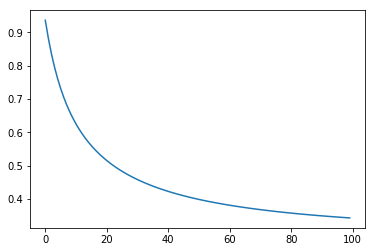

In [280]:
plt.plot(erl)


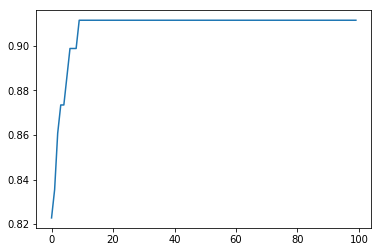

In [281]:
 plt.plot(ac)

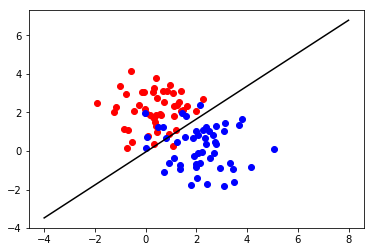

In [295]:

plt.scatter(xt[:49,0],xt[:49,1],color='r')
plt.scatter(X[49:,0],X[49:,1],color='b')
x = np.linspace(-4,8,10)
y = -(theta[0]*x + b)/theta[1]
plt.plot(x,y,color='k')

## PART-2 USING SCIKIT

In [297]:
from sklearn.linear_model import LogisticRegression

In [298]:
logisticRegr = LogisticRegression()

In [309]:
logisticRegr.fit(xt,yt)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [310]:
predictions = logisticRegr.predict(xd)
print(predictions)
print(yd)

[1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [311]:
score = logisticRegr.score(xd, yd)
print(score)

0.9
